<a href="https://colab.research.google.com/github/aastepanov-art/wine-assessment/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Домашнее задание «Сохранение результатов эксперимента»**

# 1. Import of liabraries


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Dataset and features

In [ ]:
data = pd.read_csv('winequalityN.csv')

In [ ]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.info() # Присутствуют пустые значения, есть категориальная переменная "type" - вид вина (краное/ белое)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
categorials = data.select_dtypes('object').columns
categorials

Index(['type'], dtype='object')

In [ ]:
data.isnull().sum() # Оперделяем общее количество пропущенных значений. Среди 6497 значений общее количество пропусков очень небольшое, поэтому их можно удалить

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
data = data.dropna() # Уберем пустые ячейки

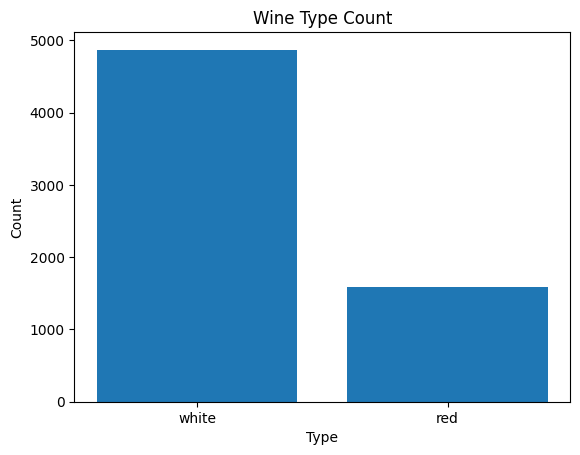

In [ ]:
type_counts = data["type"].value_counts()

plt.bar(type_counts.index, type_counts.values)

plt.title("Wine Type Count")
plt.xlabel("Type")
plt.ylabel("Count")

plt.show()

# Можем заметить очень неравномерное распределение значений среди признака "Type". Белого вина в выборке более чем в 2 раза больше чем красного вина.

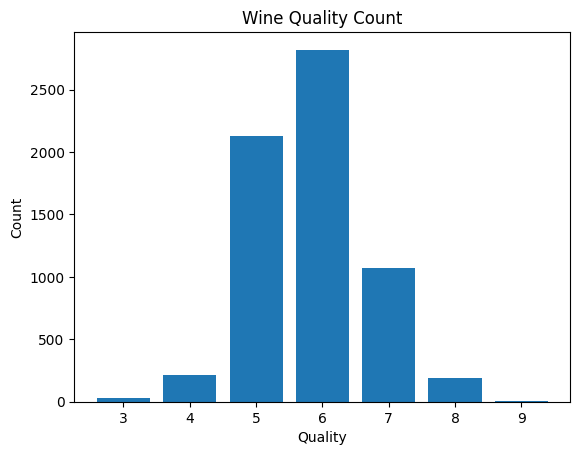

In [ ]:
quality = data['quality'].value_counts()

plt.bar(quality.index, quality.values)

plt.title("Wine Quality Count")
plt.xlabel("Quality")
plt.ylabel("Count")

plt.show()

# Что касается качества вина, то преобладает вино среднего качества (от 5 до 7). В свою очередь, хвосты - менее качественное (от 3 до 4) и очень качественно вино (от 8 до 9) составляют меньшую часть выборки.

<ipython-input-80-a10b79b9528e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


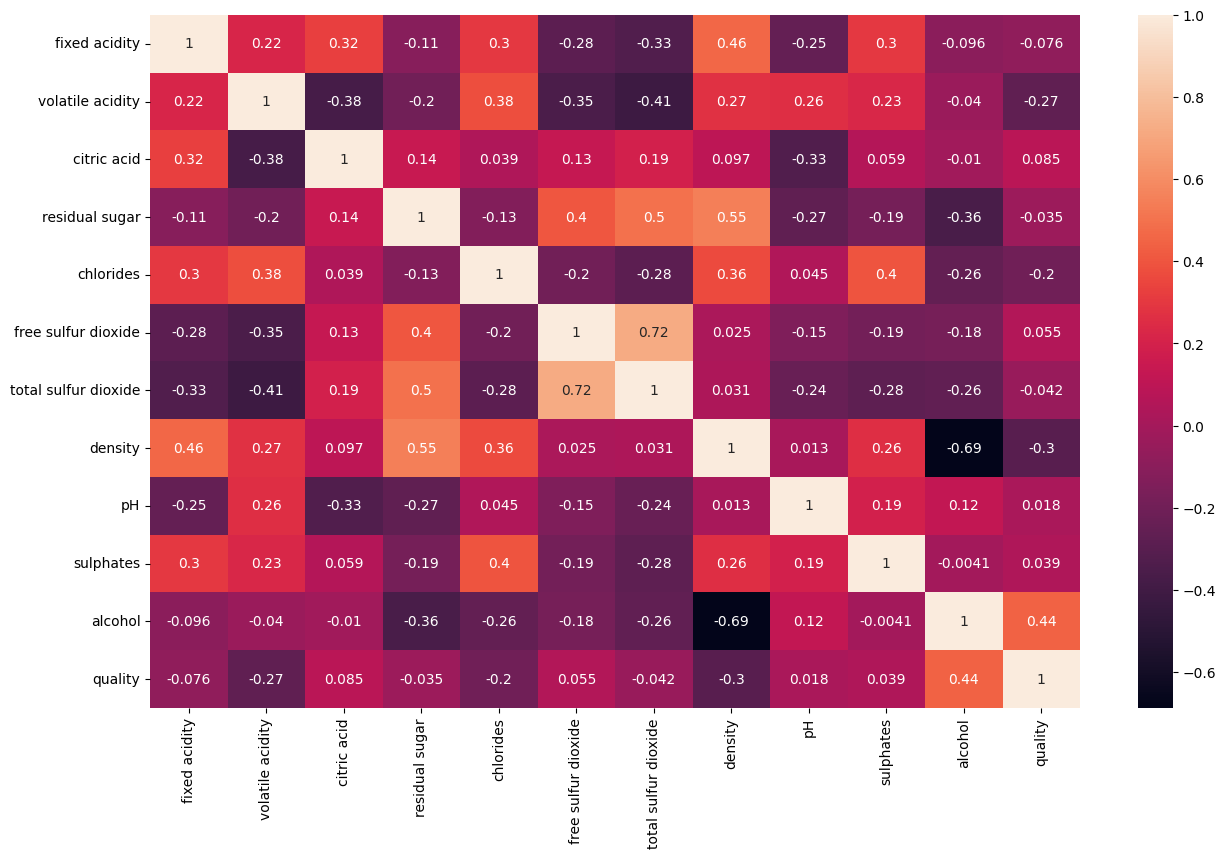

In [ ]:
corr = data.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True)
plt.show()

# Наибольшую взаимосвязь демонстрируют слеюущие признаки "Alcohol" & "Density", "free sulfur dioxide" & "total sulfur dioxide", "density" & "residual sugar"
# Учитывая высокую взаимосвязь, отдельные признаки можно удалить для ускорения модели без потери качества расчетов.

# 3. Defining a task and building a model

In [ ]:
data['best quality'] = [1 if x > 5 else 0 for x in data.quality] # Для обучения модели к определению "каждого грейда" вина необходимо больше данных, которых мы не имеем, поэтому остановимся на решении задачи бинарной классификации.

In [ ]:
dummy = pd.get_dummies(data[categorials], columns=categorials) # Создадим дамми-переменные для категориальных признаков
integer = data.select_dtypes(['int', 'float']).columns
integer = data[integer]
data = pd.concat([dummy, integer], axis=1)
data.head(500)

,type_red,type_white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,0,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,0,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0,1,6.0,0.24,0.27,1.9,0.048,40.0,170.0,0.9938,3.64,0.54,10.0,7,1
510,0,1,6.7,0.27,0.12,1.3,0.041,62.0,138.0,0.9921,3.21,0.42,10.0,6,1
511,0,1,7.8,0.34,0.35,1.8,0.042,8.0,167.0,0.9908,3.11,0.41,12.1,6,1
512,0,1,7.3,0.26,0.36,5.2,0.040,31.0,141.0,0.9931,3.16,0.59,11.0,6,1


Разделим выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['quality', 'best quality']),
                                                    data['best quality'],
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
clf_rf = RandomForestClassifier(random_state=42)

In [ ]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
imp = pd.Series(clf_rf.feature_importances_) # Для обучения модели предлагается использовать наиболее важные признаки, определенные алгоритмом RandomForestClassifier

In [ ]:
imp = imp.sort_values(ascending=False)
imp

12    0.146409
3     0.118765
9     0.101918
6     0.086403
8     0.085602
7     0.083928
4     0.077854
5     0.076920
11    0.076762
10    0.072084
2     0.066192
0     0.004015
1     0.003147
dtype: float64

In [ ]:
columns = data.columns
columns

Index(['type_red', 'type_white', 'fixed acidity', 'volatile acidity',
       'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'best quality'],
      dtype='object')

In [ ]:
for i, item in enumerate(columns):
    print(i + 1, item)

1 type_red
2 type_white
3 fixed acidity
4 volatile acidity
5 citric acid
6 residual sugar
7 chlorides
8 free sulfur dioxide
9 total sulfur dioxide
10 density
11 pH
12 sulphates
13 alcohol
14 quality
15 best quality


In [ ]:
X_train = X_train[['sulphates', 'fixed acidity', 'total sulfur dioxide', 'residual sugar']]

In [ ]:
X_test = X_test[['sulphates', 'fixed acidity', 'total sulfur dioxide', 'residual sugar']]

In [ ]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
clf_rf_predictions = clf_rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
clf_rf_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, clf_rf_predictions))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65       482
           1       0.78      0.86      0.82       811

    accuracy                           0.76      1293
   macro avg       0.75      0.73      0.74      1293
weighted avg       0.76      0.76      0.76      1293



Точность модели составляет 0,76. Это значит, что модель способна с точностью до 76% классифицировать вино на хорошее и плохое. Неплохой результат, но есть к чему стремиться. Для улучшения качества результатов можно попробовать другие модели, а также иные признаки.